## IBM Employees' Attrition Rate 

### The problem

How can IBM reduce the attrition rate in its departments?
As taking a quick action, which factors can IBM use to implement a strategy based on factors collected in IBM employees information Data Set?


### Data Analysis

First, we need to observe data and do some analysis to determine factors that can be useful to find a solution:


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('HR-Employee-Attrition.csv')

Looking at the structure of Data Set and some its records:

In [17]:
df.info()
print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Looking at Departments' categories:

In [15]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [7]:
print('\n')
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

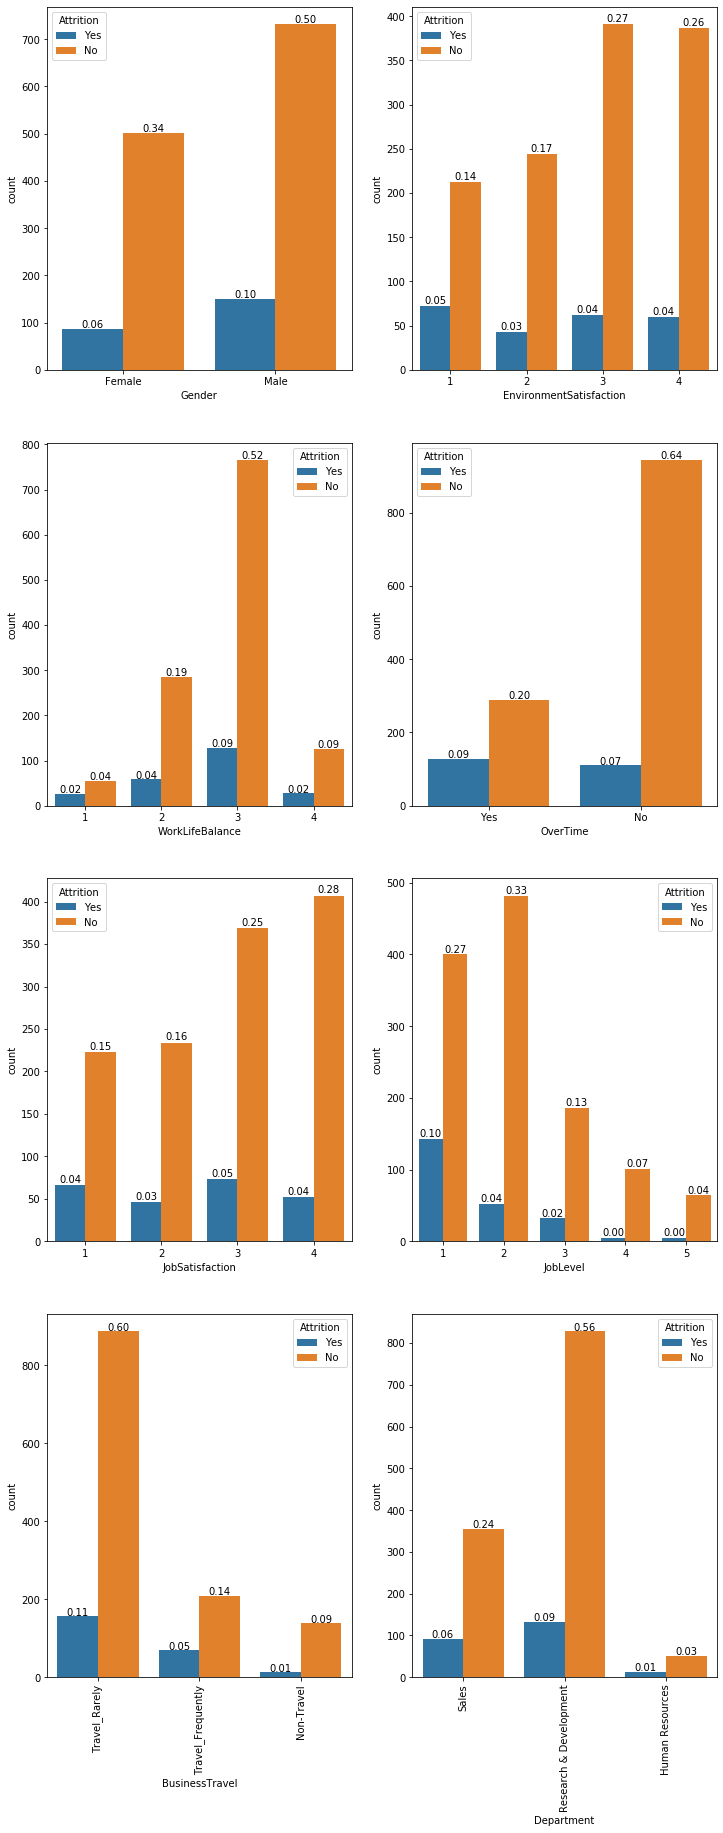

In [25]:
total_records= len(df)
columns = ["Gender","EnvironmentSatisfaction","WorkLifeBalance","OverTime","JobSatisfaction",
           "JobLevel","BusinessTravel","Department"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    ax1 = sns.countplot(data=df,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

Observations of above graphical representations, Sales Department has the highest attrition rate especially in given attribute of job satisfaction.  


### The potential solution

To increase employees' Job Satisfaction for purpose of decreasing attrition rate, we need to provide more facilities to employees. We choose the Sales Department to prove this idea, and provide some new equipments and facilities to the Sales Department. Results will be compared after 6 months.


### The method of testing the solution

After providing more equipments and facilities to the Sales Departments, we will survey employess to evaluate their job satsfaction then add the new data to the data set for doing some tests. We will Compare the employees' level of job satisfaction and  the attrition rate in Sales Department with previous data and also other departments. The keys metric are level of job satisfaction, and attrition rate.
If the employees' level of job satisfaction in the Sales Department increases and the attrition rate decreases then we can approach to conclusion by running some tests. 


In [33]:
s1 = df.loc[df['Department']=='Sales'].loc[df['Attrition']=='Yes']

print('Mean of JobSatisfaction in Sales Department before implementing the solution: {}\n'.format(s1.JobSatisfaction.mean()))

s11 = df.copy()

s11['Attrition'].loc[s11['Attrition'] == 'Yes'] = 1
s11['Attrition'].loc[s11['Attrition'] == 'No'] = 0

print('Mean of Attrition in Sales Department before implementing the solution: {}'.format(s11['Attrition'].loc[s11['Department']=='Sales'].mean()))



Mean of JobSatisfaction in Sales Department before implementing the solution: 2.5217391304347827

Mean of Attrition in Sales Department before implementing the solution: 0.2062780269058296


In [ ]:
s_new = df.loc[df['Department']=='Sales'].loc[df['Attrition']=='Yes']
stats.ttest_ind(
    df[df['Department']=='Sales'].JobSatisfaction,
    s_new[s_new['Department']=='Sales'].JobSatisfaction)

### Evaluation the solution

The result of t_test will lead us to the conclusion. With a p_value< 0.05 the plan will be significant that means within the 95% confidence interval we can dismiss the null hypothesis that these samples are significantly different. 

### Conclusion
If the result of the plan is significant that means the solution impacts on the job satisfaction, and decreases attrition rate. The plan can be used the other departments. If the solution does not make chang on niether job satisfaction nor attrition rate that means we should find another solution. If the plan increases job satisfaction but does not change attrition rate that means the job satisfaction is not an important factor for the attrition rate.
The experiment will give us good data to work with, help us answer our hypothesis, and guide our decision making on how to further improve the level of job satisfaction, or it could also mean that the hypothesis was wrong, and this solution does not decrease the attrition rate, therefore, we should discontinue it.
